> **DO NOT EDIT IF INSIDE `annadl_f19` folder** 

# Assignment 1

**Handin in Peergrade**: *Monday*, October 14, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 18, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

> **Ex. 1.2.2**: Create a neural network with `sizes=[2, 1]`. This is actually just our most basic Perceptron model with two inputs and a single output. Generate 1e5 training datapoints and 1e4 testing datapoints using the `generate_X_linear` function, and fit the neural network to this data. Once you've fitted the network, make two plots of your test datapoints, one where points are colored by predictions and another where points are colored by their true labels. Can you say something about the points that are being mislabeled?
>
>*Hint*: You'll probably find some of Nielsen's examples from [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) in his book useful. Also, note that predictions are values between 0 and 1, not hard 0s and 1s, due to the sigmoid activation function. You can deal with this however you like when you color the points by prediction.

## SOLUTION:

In [1]:
%matplotlib inline
%load_ext tensorboard

import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # Q: Print these out, explain their contents. You can instantiate a network by
        # doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        # Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
        # network, what is the shape of `a` at each iteration?
        for b, w in zip(self.biases, self.weights): # 
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        # Ulf: For now we just treat this function as a black box.
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        # Ulf: For now we just treat this function as a black box.

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        # Ulf: For now we just treat this function as a black box.
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

In [3]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

In [4]:
x_train, y_train = generate_X_linear(1e5)
x_test, y_test = generate_X_linear(1e4)

In [5]:
network = Network([2, 1])

In [6]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

In [7]:
class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

In [8]:
train_set_linear = prepare_data(x_train ,y_train)
test_set_linear = prepare_data(x_test, y_test)

In [9]:
network.SGD(train_set_linear, epochs=5, mini_batch_size=100, eta=15.0, test_data=test_set_linear)

Epoch 0: 9976 / 10000
Epoch 1: 9978 / 10000
Epoch 2: 9978 / 10000
Epoch 3: 9977 / 10000
Epoch 4: 9976 / 10000


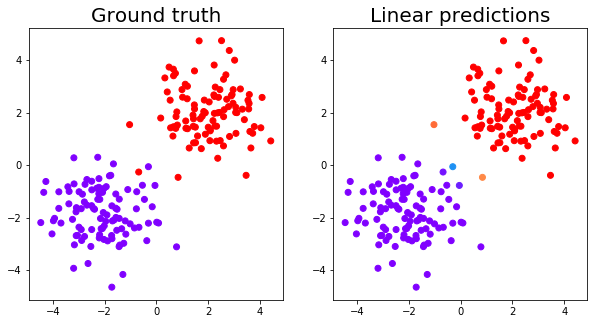

In [18]:
plot_x, plot_y = generate_X_linear()
plot_set = prepare_data(plot_x, plot_y)

preds = np.array([network.feedforward(xy[0]) for xy in plot_set])
preds = np.array([x[0] for x in preds]).flatten()

truths = np.array([xy[1][0] for xy in plot_set])
         
coords = np.array([xy[0] for xy in plot_set])
Xs = [c[0] for c in coords]
Ys = [c[1] for c in coords]

cmap = cmap_in_range([0,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(plot_x[:,0], plot_x[:,1], c=[cmap(t) for t in plot_y.flatten()])
plt.title("Ground truth", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(plot_x[:,0], plot_x[:,1], c=[cmap(pred) for pred in preds])
plt.title("Linear predictions", fontsize=20)
plt.show()

There are only a few points that are mislabeled. These misclassified points are basically outliers of each group - positioned far from the center of the rest of its group.

> **Ex. 1.2.3**: Now we want to do the same thing as in Ex. 1.2.2, but with the data generated with the `generate_X_nonlinear` function.
>
>*Hint*: Think back to the slides to figure out what `sizes` should be.

In [19]:
def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

In [20]:
network_nonlinear = Network([2, 3, 1])

In [21]:
# generate training and testing data
train_x_nonlin, train_y_nonlin = generate_X_nonlinear(1e5)
test_x_nonlin, test_y_nonlin = generate_X_nonlinear(1e4)

In [22]:
training_set_nonlin = prepare_data(train_x_nonlin, train_y_nonlin)
testing_set_nonlin = prepare_data(test_x_nonlin, test_y_nonlin)

In [23]:
# fit the neural network
network_nonlinear.SGD(training_set_nonlin, epochs=5, mini_batch_size=100, eta=20.0, test_data=testing_set_nonlin)

Epoch 0: 9738 / 10000
Epoch 1: 9685 / 10000
Epoch 2: 9778 / 10000
Epoch 3: 9777 / 10000
Epoch 4: 9759 / 10000


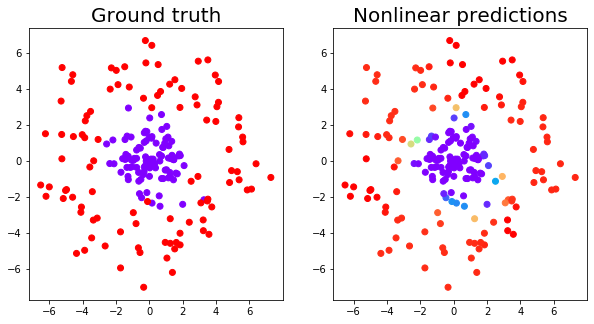

In [24]:
plot_x_nonlinear, plot_y_nonlinear = generate_X_nonlinear()
plot_set_nonlinear = prepare_data(plot_x_nonlinear, plot_y_nonlinear)

preds = np.array([network_nonlinear.feedforward(xy[0]) for xy in plot_set_nonlinear])
preds = np.array([x[0] for x in preds]).flatten()

truths = np.array([xy[1][0] for xy in plot_set_nonlinear])
         
coords = np.array([xy[0] for xy in plot_set_nonlinear])
Xs = [c[0] for c in coords]
Ys = [c[1] for c in coords]

cmap = cmap_in_range([0,1])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(plot_x_nonlinear[:,0], plot_x_nonlinear[:,1], c=[cmap(t) for t in plot_y_nonlinear.flatten()])
plt.title("Ground truth", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(plot_x_nonlinear[:,0], plot_x_nonlinear[:,1], c=[cmap(pred) for pred in preds])
plt.title("Nonlinear predictions", fontsize=20)
plt.show()

The points that are mislabeled are those that deviate from the group of points in the origin.

### Week 2

<img src="https://raw.githubusercontent.com/abjer/tsds/master/material_exercises/week_3/2_3_1_net.png" alt="drawing" width="500"/>

> **Ex. 2.2.1**: The network above has a defined input and weights. If the true label for the datapoint `[4, 2]` is 1, what is the cost?

## SOLUTION:


In [27]:
import numpy as np


a = sigmoid(1 + 0.5*4 + 1*2)
b = sigmoid(-1 + 2*4 + 10*2)
c = sigmoid(2 + -5*4 + 0.3*2)
d = sigmoid(-3 + 12*a + -8*b + 0.2*c)

cost = (1 - d)**2
print('The cost is %f' % cost)

The cost is 0.081237


> **Ex. 2.2.2**: Knowing about backpropagation, we actually have everything we need to compute the gradients of the weights by hand. So go ahead and do that. Report your answer either as a diagram that includes the gradients (you can draw on my figure somehow and insert the resulting image), or just by writing what the gradient of each weight is.
>
> *Hint: When computing gradients with backprop, it can be a bit easier to think of the network as a computational graph. My computational graph looks like [this](https://github.com/abjer/tsds/blob/master/material_exercises/week_3/2_3_1_net_compgraph.png?raw=true).*

## SOLUTION:

![solution_image](https://camo.githubusercontent.com/0aedbec64a1fc349a9785fc76a49db0a8b618a7d/68747470733a2f2f7777772e65646e617372617463697065732e636f6d2f696d616765732f6e65745f636f6d7067726170685f66696c6c65642e706e67)

In case the image is too small click [here](https://camo.githubusercontent.com/0aedbec64a1fc349a9785fc76a49db0a8b618a7d/68747470733a2f2f7777772e65646e617372617463697065732e636f6d2f696d616765732f6e65745f636f6d7067726170685f66696c6c65642e706e67)

### Week 3

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

## SOLUTION:

### exercise 1.2.2

In [28]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras import optimizers

In [29]:
# generate training and test data
x_train_lin, y_train_lin = generate_X_linear(1e5)
x_test_lin, y_test_lin = generate_X_linear(1e4)

In [30]:
# 1.2.2 model [2, 1]

model_lin = Sequential() # sequential model

model_lin.add(Dense(units=2, activation='sigmoid', input_shape=(2,))) # input shape (N, 2)
model_lin.add(Dense(units=1, activation='sigmoid'))

model_lin.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
model_lin.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_lin.fit(x_train_lin, y_train_lin, epochs=5, batch_size=100)


Epoch 1/5
100000/100000 [==============================] - 2s 21us/step - loss: 0.4202 - acc: 0.9797
Epoch 2/5
100000/100000 [==============================] - 2s 17us/step - loss: 0.1880 - acc: 0.9965
Epoch 3/5
100000/100000 [==============================] - 2s 17us/step - loss: 0.1118 - acc: 0.9971
Epoch 4/5
100000/100000 [==============================] - 2s 17us/step - loss: 0.0791 - acc: 0.9973
Epoch 5/5
100000/100000 [==============================] - 2s 17us/step - loss: 0.0613 - acc: 0.9974


In [33]:
model_lin.evaluate(x_test_lin, y_test_lin)

10000/10000 [==============================] - 0s 24us/step


[0.05407615171074867, 0.9973]

### exercise 1.2.3

In [34]:
# generate training and test data
x_train_nonlin, y_train_nonlin = generate_X_nonlinear(1e5)
x_test_nonlin, y_test_nonlin = generate_X_nonlinear(1e4)

In [36]:
## 1.2.3 model [2, 3, 1]

model_nonlin = Sequential()

model_nonlin.add(Dense(units=2, activation='sigmoid', input_shape=(2, )))
model_nonlin.add(Dense(units=3, activation='sigmoid'))
model_nonlin.add(Dense(units=1, activation='sigmoid'))

# optimizer
sgd = optimizers.SGD(lr=1.5)

model_nonlin.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model_nonlin.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_nonlin.fit(x_train_nonlin, y_train_nonlin, epochs=15, batch_size=100)

Epoch 1/15
100000/100000 [==============================] - 3s 26us/step - loss: 0.5239 - acc: 0.6976
Epoch 2/15
100000/100000 [==============================] - 2s 18us/step - loss: 0.3717 - acc: 0.8440
Epoch 3/15
100000/100000 [==============================] - 2s 16us/step - loss: 0.3732 - acc: 0.8436
Epoch 4/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3664 - acc: 0.8489
Epoch 5/15
100000/100000 [==============================] - 1s 15us/step - loss: 0.3623 - acc: 0.8520
Epoch 6/15
100000/100000 [==============================] - 2s 17us/step - loss: 0.3592 - acc: 0.8542
Epoch 7/15
100000/100000 [==============================] - 2s 17us/step - loss: 0.3580 - acc: 0.8546
Epoch 8/15
100000/100000 [==============================] - 1s 14us/step - loss: 0.3599 - acc: 0.8533
Epoch 9/15
100000/100000 [==============================] - 1s 15us/step - loss: 0.3559 - acc: 0.8563
Epoch 10/15
100000/100000 [==============================] - 2s 15us/step - loss: 

In [38]:
model_nonlin.evaluate(x_test_nonlin, y_test_nonlin)

10000/10000 [==============================] - 0s 31us/step


[0.26144201171343523, 0.9075]

Using the same architecture, there seems no difference in training speed or performance for exercise 1.2.2. However, there looks to be a differencei n both speed and performance for exercise 1.2.3. In fact, the Keras implementation trains slower and performs worse given the same hyperparameters. Even after adjusting for the hyperparameters, the Keras implementation still seems to lag behind. 

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

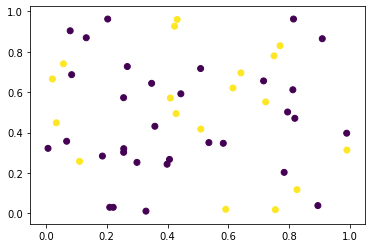

In [39]:
# Generate some data-points
x = np.random.random(size=(50, 2))

# And some random outcomes
y = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

## SOLUTION:

In [40]:
from datetime import datetime

logdir = './logs'# + datetime.now().strftime("%Y%m%d-%H%M%S") # log file name
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
model_overfit = Sequential()

model_overfit.add(Dense(units=1024, activation='sigmoid', input_shape=(2,)))
model_overfit.add(Dense(units=1024, activation='sigmoid'))
model_overfit.add(Dense(units=1, activation='sigmoid'))

model_overfit.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

> The cell blow may take a couple of minutes but should overfit.

In [79]:
model_overfit.fit(x, y, epochs=5000, batch_size=100, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/5000
50/50 [==============================] - 1s 14ms/step - loss: 0.6546 - acc: 0.6400
Epoch 2/5000
50/50 [==============================] - 0s 409us/step - loss: 1.9876 - acc: 0.6400
Epoch 3/5000
50/50 [==============================] - 0s 557us/step - loss: 0.9661 - acc: 0.6400
Epoch 4/5000
50/50 [==============================] - 0s 477us/step - loss: 1.1326 - acc: 0.3600
Epoch 5/5000
50/50 [==============================] - 0s 443us/step - loss: 1.2602 - acc: 0.3600
Epoch 6/5000
50/50 [==============================] - 0s 550us/step - loss: 0.7420 - acc: 0.3600
Epoch 7/5000
50/50 [==============================] - 0s 693us/step - loss: 0.7523 - acc: 0.6400
Epoch 8/5000
50/50 [==============================] - 0s 737us/step - loss: 0.9993 - acc: 0.6400
Epoch 9/5000
50/50 [==============================] - 0s 781us/step - loss: 1.0186 - acc: 0.6400
Epoch 10/5000
50/50 [==============================] - 0s 626us/step - loss: 0.8393 - acc: 0.6400
Epoch 11/5000
50/50 [=========

Epoch 85/5000
50/50 [==============================] - 0s 734us/step - loss: 0.6526 - acc: 0.6400
Epoch 86/5000
50/50 [==============================] - 0s 681us/step - loss: 0.6526 - acc: 0.6400
Epoch 87/5000
50/50 [==============================] - 0s 668us/step - loss: 0.6524 - acc: 0.6400
Epoch 88/5000
50/50 [==============================] - 0s 638us/step - loss: 0.6524 - acc: 0.6400
Epoch 89/5000
50/50 [==============================] - 0s 553us/step - loss: 0.6525 - acc: 0.6400
Epoch 90/5000
50/50 [==============================] - 0s 553us/step - loss: 0.6524 - acc: 0.6400
Epoch 91/5000
50/50 [==============================] - 0s 538us/step - loss: 0.6524 - acc: 0.6400
Epoch 92/5000
50/50 [==============================] - 0s 446us/step - loss: 0.6524 - acc: 0.6400
Epoch 93/5000
50/50 [==============================] - 0s 483us/step - loss: 0.6524 - acc: 0.6400
Epoch 94/5000
50/50 [==============================] - 0s 666us/step - loss: 0.6523 - acc: 0.6400
Epoch 95/5000
50/50 

Epoch 168/5000
50/50 [==============================] - 0s 472us/step - loss: 0.6506 - acc: 0.6400
Epoch 169/5000
50/50 [==============================] - 0s 530us/step - loss: 0.6506 - acc: 0.6400
Epoch 170/5000
50/50 [==============================] - 0s 654us/step - loss: 0.6506 - acc: 0.6400
Epoch 171/5000
50/50 [==============================] - 0s 676us/step - loss: 0.6505 - acc: 0.6400
Epoch 172/5000
50/50 [==============================] - 0s 485us/step - loss: 0.6505 - acc: 0.6400
Epoch 173/5000
50/50 [==============================] - 0s 526us/step - loss: 0.6505 - acc: 0.6400
Epoch 174/5000
50/50 [==============================] - 0s 553us/step - loss: 0.6504 - acc: 0.6400
Epoch 175/5000
50/50 [==============================] - 0s 562us/step - loss: 0.6504 - acc: 0.6400
Epoch 176/5000
50/50 [==============================] - 0s 634us/step - loss: 0.6504 - acc: 0.6400
Epoch 177/5000
50/50 [==============================] - 0s 538us/step - loss: 0.6503 - acc: 0.6400
Epoch 178/

Epoch 251/5000
50/50 [==============================] - 0s 637us/step - loss: 0.6468 - acc: 0.6400
Epoch 252/5000
50/50 [==============================] - 0s 529us/step - loss: 0.6468 - acc: 0.6400
Epoch 253/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6467 - acc: 0.6400
Epoch 254/5000
50/50 [==============================] - 0s 481us/step - loss: 0.6467 - acc: 0.6400
Epoch 255/5000
50/50 [==============================] - 0s 412us/step - loss: 0.6466 - acc: 0.6400
Epoch 256/5000
50/50 [==============================] - 0s 481us/step - loss: 0.6465 - acc: 0.6400
Epoch 257/5000
50/50 [==============================] - 0s 546us/step - loss: 0.6465 - acc: 0.6400
Epoch 258/5000
50/50 [==============================] - 0s 672us/step - loss: 0.6464 - acc: 0.6400
Epoch 259/5000
50/50 [==============================] - 0s 749us/step - loss: 0.6464 - acc: 0.6400
Epoch 260/5000
50/50 [==============================] - 0s 490us/step - loss: 0.6463 - acc: 0.6400
Epoch 261/

Epoch 334/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6424 - acc: 0.6400
Epoch 335/5000
50/50 [==============================] - 0s 547us/step - loss: 0.6424 - acc: 0.6400
Epoch 336/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6423 - acc: 0.6400
Epoch 337/5000
50/50 [==============================] - 0s 600us/step - loss: 0.6423 - acc: 0.6400
Epoch 338/5000
50/50 [==============================] - 0s 598us/step - loss: 0.6423 - acc: 0.6400
Epoch 339/5000
50/50 [==============================] - 0s 590us/step - loss: 0.6422 - acc: 0.6400
Epoch 340/5000
50/50 [==============================] - 0s 536us/step - loss: 0.6422 - acc: 0.6400
Epoch 341/5000
50/50 [==============================] - 0s 572us/step - loss: 0.6422 - acc: 0.6400
Epoch 342/5000
50/50 [==============================] - 0s 533us/step - loss: 0.6421 - acc: 0.6400
Epoch 343/5000
50/50 [==============================] - 0s 554us/step - loss: 0.6421 - acc: 0.6400
Epoch 344/

Epoch 417/5000
50/50 [==============================] - 0s 541us/step - loss: 0.6414 - acc: 0.6000
Epoch 418/5000
50/50 [==============================] - 0s 645us/step - loss: 0.6414 - acc: 0.6000
Epoch 419/5000
50/50 [==============================] - 0s 585us/step - loss: 0.6414 - acc: 0.6000
Epoch 420/5000
50/50 [==============================] - 0s 482us/step - loss: 0.6414 - acc: 0.6000
Epoch 421/5000
50/50 [==============================] - 0s 442us/step - loss: 0.6414 - acc: 0.6000
Epoch 422/5000
50/50 [==============================] - 0s 612us/step - loss: 0.6414 - acc: 0.6000
Epoch 423/5000
50/50 [==============================] - 0s 526us/step - loss: 0.6414 - acc: 0.6000
Epoch 424/5000
50/50 [==============================] - 0s 527us/step - loss: 0.6414 - acc: 0.6000
Epoch 425/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6414 - acc: 0.6000
Epoch 426/5000
50/50 [==============================] - 0s 609us/step - loss: 0.6414 - acc: 0.6000
Epoch 427/

Epoch 500/5000
50/50 [==============================] - 0s 727us/step - loss: 0.6414 - acc: 0.6000
Epoch 501/5000
50/50 [==============================] - 0s 586us/step - loss: 0.6414 - acc: 0.6000
Epoch 502/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6414 - acc: 0.6000
Epoch 503/5000
50/50 [==============================] - 0s 585us/step - loss: 0.6414 - acc: 0.6000
Epoch 504/5000
50/50 [==============================] - 0s 507us/step - loss: 0.6414 - acc: 0.6000
Epoch 505/5000
50/50 [==============================] - 0s 653us/step - loss: 0.6414 - acc: 0.6000
Epoch 506/5000
50/50 [==============================] - 0s 629us/step - loss: 0.6414 - acc: 0.6000
Epoch 507/5000
50/50 [==============================] - 0s 505us/step - loss: 0.6414 - acc: 0.6000
Epoch 508/5000
50/50 [==============================] - 0s 505us/step - loss: 0.6414 - acc: 0.6000
Epoch 509/5000
50/50 [==============================] - 0s 614us/step - loss: 0.6414 - acc: 0.6000
Epoch 510/

Epoch 583/5000
50/50 [==============================] - 0s 488us/step - loss: 0.6414 - acc: 0.6000
Epoch 584/5000
50/50 [==============================] - 0s 741us/step - loss: 0.6414 - acc: 0.6000
Epoch 585/5000
50/50 [==============================] - 0s 451us/step - loss: 0.6414 - acc: 0.6000
Epoch 586/5000
50/50 [==============================] - 0s 812us/step - loss: 0.6414 - acc: 0.6000
Epoch 587/5000
50/50 [==============================] - 0s 419us/step - loss: 0.6414 - acc: 0.6000
Epoch 588/5000
50/50 [==============================] - 0s 504us/step - loss: 0.6414 - acc: 0.6000
Epoch 589/5000
50/50 [==============================] - 0s 569us/step - loss: 0.6414 - acc: 0.6000
Epoch 590/5000
50/50 [==============================] - 0s 482us/step - loss: 0.6414 - acc: 0.6000
Epoch 591/5000
50/50 [==============================] - 0s 497us/step - loss: 0.6414 - acc: 0.6000
Epoch 592/5000
50/50 [==============================] - 0s 582us/step - loss: 0.6414 - acc: 0.6000
Epoch 593/

Epoch 666/5000
50/50 [==============================] - 0s 476us/step - loss: 0.6413 - acc: 0.6000
Epoch 667/5000
50/50 [==============================] - 0s 883us/step - loss: 0.6413 - acc: 0.6000
Epoch 668/5000
50/50 [==============================] - 0s 696us/step - loss: 0.6413 - acc: 0.6000
Epoch 669/5000
50/50 [==============================] - 0s 505us/step - loss: 0.6413 - acc: 0.6000
Epoch 670/5000
50/50 [==============================] - 0s 942us/step - loss: 0.6413 - acc: 0.6000
Epoch 671/5000
50/50 [==============================] - 0s 439us/step - loss: 0.6413 - acc: 0.6000
Epoch 672/5000
50/50 [==============================] - 0s 537us/step - loss: 0.6413 - acc: 0.6000
Epoch 673/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6413 - acc: 0.6000
Epoch 674/5000
50/50 [==============================] - 0s 649us/step - loss: 0.6413 - acc: 0.6000
Epoch 675/5000
50/50 [==============================] - 0s 555us/step - loss: 0.6413 - acc: 0.6000
Epoch 676/

Epoch 749/5000
50/50 [==============================] - 0s 594us/step - loss: 0.6413 - acc: 0.6000
Epoch 750/5000
50/50 [==============================] - 0s 544us/step - loss: 0.6413 - acc: 0.6000
Epoch 751/5000
50/50 [==============================] - 0s 451us/step - loss: 0.6413 - acc: 0.6000
Epoch 752/5000
50/50 [==============================] - 0s 579us/step - loss: 0.6413 - acc: 0.6000
Epoch 753/5000
50/50 [==============================] - 0s 603us/step - loss: 0.6413 - acc: 0.6000
Epoch 754/5000
50/50 [==============================] - 0s 636us/step - loss: 0.6413 - acc: 0.6000
Epoch 755/5000
50/50 [==============================] - 0s 504us/step - loss: 0.6413 - acc: 0.6000
Epoch 756/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6413 - acc: 0.6000
Epoch 757/5000
50/50 [==============================] - 0s 616us/step - loss: 0.6413 - acc: 0.6000
Epoch 758/5000
50/50 [==============================] - 0s 595us/step - loss: 0.6413 - acc: 0.6000
Epoch 759/

Epoch 832/5000
50/50 [==============================] - 0s 531us/step - loss: 0.6413 - acc: 0.6000
Epoch 833/5000
50/50 [==============================] - 0s 652us/step - loss: 0.6413 - acc: 0.6000
Epoch 834/5000
50/50 [==============================] - 0s 625us/step - loss: 0.6413 - acc: 0.6000
Epoch 835/5000
50/50 [==============================] - 0s 577us/step - loss: 0.6413 - acc: 0.6000
Epoch 836/5000
50/50 [==============================] - 0s 592us/step - loss: 0.6413 - acc: 0.6000
Epoch 837/5000
50/50 [==============================] - 0s 457us/step - loss: 0.6413 - acc: 0.6000
Epoch 838/5000
50/50 [==============================] - 0s 461us/step - loss: 0.6413 - acc: 0.6000
Epoch 839/5000
50/50 [==============================] - 0s 573us/step - loss: 0.6413 - acc: 0.6000
Epoch 840/5000
50/50 [==============================] - 0s 657us/step - loss: 0.6413 - acc: 0.6000
Epoch 841/5000
50/50 [==============================] - 0s 554us/step - loss: 0.6413 - acc: 0.6000
Epoch 842/

Epoch 915/5000
50/50 [==============================] - 0s 534us/step - loss: 0.6413 - acc: 0.6000
Epoch 916/5000
50/50 [==============================] - 0s 482us/step - loss: 0.6413 - acc: 0.6000
Epoch 917/5000
50/50 [==============================] - 0s 523us/step - loss: 0.6413 - acc: 0.6000
Epoch 918/5000
50/50 [==============================] - 0s 575us/step - loss: 0.6413 - acc: 0.6000
Epoch 919/5000
50/50 [==============================] - 0s 550us/step - loss: 0.6413 - acc: 0.6000
Epoch 920/5000
50/50 [==============================] - 0s 765us/step - loss: 0.6413 - acc: 0.6000
Epoch 921/5000
50/50 [==============================] - 0s 706us/step - loss: 0.6413 - acc: 0.6000
Epoch 922/5000
50/50 [==============================] - 0s 670us/step - loss: 0.6413 - acc: 0.6000
Epoch 923/5000
50/50 [==============================] - 0s 739us/step - loss: 0.6413 - acc: 0.6000
Epoch 924/5000
50/50 [==============================] - 0s 503us/step - loss: 0.6413 - acc: 0.6000
Epoch 925/

Epoch 998/5000
50/50 [==============================] - 0s 569us/step - loss: 0.6413 - acc: 0.6000
Epoch 999/5000
50/50 [==============================] - 0s 412us/step - loss: 0.6413 - acc: 0.6000
Epoch 1000/5000
50/50 [==============================] - 0s 625us/step - loss: 0.6413 - acc: 0.6000
Epoch 1001/5000
50/50 [==============================] - 0s 581us/step - loss: 0.6413 - acc: 0.6000
Epoch 1002/5000
50/50 [==============================] - 0s 600us/step - loss: 0.6413 - acc: 0.6000
Epoch 1003/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6413 - acc: 0.6000
Epoch 1004/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6413 - acc: 0.6000
Epoch 1005/5000
50/50 [==============================] - 0s 527us/step - loss: 0.6413 - acc: 0.6000
Epoch 1006/5000
50/50 [==============================] - 0s 547us/step - loss: 0.6413 - acc: 0.6000
Epoch 1007/5000
50/50 [==============================] - 0s 560us/step - loss: 0.6413 - acc: 0.6000
Ep

Epoch 1080/5000
50/50 [==============================] - 0s 498us/step - loss: 0.6412 - acc: 0.6000
Epoch 1081/5000
50/50 [==============================] - 0s 672us/step - loss: 0.6412 - acc: 0.6000
Epoch 1082/5000
50/50 [==============================] - 0s 710us/step - loss: 0.6412 - acc: 0.6000
Epoch 1083/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6412 - acc: 0.6000
Epoch 1084/5000
50/50 [==============================] - 0s 502us/step - loss: 0.6412 - acc: 0.6000
Epoch 1085/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6412 - acc: 0.6000
Epoch 1086/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6412 - acc: 0.6000
Epoch 1087/5000
50/50 [==============================] - 0s 473us/step - loss: 0.6412 - acc: 0.6000
Epoch 1088/5000
50/50 [==============================] - 0s 544us/step - loss: 0.6412 - acc: 0.6000
Epoch 1089/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6412 - acc: 0.6000


Epoch 1162/5000
50/50 [==============================] - 0s 539us/step - loss: 0.6412 - acc: 0.6000
Epoch 1163/5000
50/50 [==============================] - 0s 676us/step - loss: 0.6412 - acc: 0.6000
Epoch 1164/5000
50/50 [==============================] - 0s 491us/step - loss: 0.6412 - acc: 0.6000
Epoch 1165/5000
50/50 [==============================] - 0s 549us/step - loss: 0.6412 - acc: 0.6000
Epoch 1166/5000
50/50 [==============================] - 0s 595us/step - loss: 0.6412 - acc: 0.6000
Epoch 1167/5000
50/50 [==============================] - 0s 502us/step - loss: 0.6412 - acc: 0.6000
Epoch 1168/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6412 - acc: 0.6000
Epoch 1169/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6412 - acc: 0.6000
Epoch 1170/5000
50/50 [==============================] - 0s 525us/step - loss: 0.6412 - acc: 0.6000
Epoch 1171/5000
50/50 [==============================] - 0s 560us/step - loss: 0.6412 - acc: 0.6000


Epoch 1244/5000
50/50 [==============================] - 0s 711us/step - loss: 0.6411 - acc: 0.6000
Epoch 1245/5000
50/50 [==============================] - 0s 479us/step - loss: 0.6411 - acc: 0.6000
Epoch 1246/5000
50/50 [==============================] - 0s 430us/step - loss: 0.6411 - acc: 0.6000
Epoch 1247/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6411 - acc: 0.6000
Epoch 1248/5000
50/50 [==============================] - 0s 676us/step - loss: 0.6411 - acc: 0.6000
Epoch 1249/5000
50/50 [==============================] - 0s 556us/step - loss: 0.6411 - acc: 0.6000
Epoch 1250/5000
50/50 [==============================] - 0s 575us/step - loss: 0.6411 - acc: 0.6000
Epoch 1251/5000
50/50 [==============================] - 0s 478us/step - loss: 0.6411 - acc: 0.6000
Epoch 1252/5000
50/50 [==============================] - 0s 515us/step - loss: 0.6411 - acc: 0.6000
Epoch 1253/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6411 - acc: 0.6000


Epoch 1326/5000
50/50 [==============================] - 0s 547us/step - loss: 0.6412 - acc: 0.6000
Epoch 1327/5000
50/50 [==============================] - 0s 434us/step - loss: 0.6431 - acc: 0.6400
Epoch 1328/5000
50/50 [==============================] - 0s 403us/step - loss: 0.6444 - acc: 0.6400
Epoch 1329/5000
50/50 [==============================] - 0s 438us/step - loss: 0.6436 - acc: 0.6400
Epoch 1330/5000
50/50 [==============================] - 0s 464us/step - loss: 0.6415 - acc: 0.6000
Epoch 1331/5000
50/50 [==============================] - 0s 344us/step - loss: 0.6412 - acc: 0.6000
Epoch 1332/5000
50/50 [==============================] - 0s 471us/step - loss: 0.6425 - acc: 0.6400
Epoch 1333/5000
50/50 [==============================] - 0s 562us/step - loss: 0.6430 - acc: 0.6400
Epoch 1334/5000
50/50 [==============================] - 0s 524us/step - loss: 0.6420 - acc: 0.6400
Epoch 1335/5000
50/50 [==============================] - 0s 549us/step - loss: 0.6411 - acc: 0.6000


Epoch 1408/5000
50/50 [==============================] - 0s 502us/step - loss: 0.6410 - acc: 0.6000
Epoch 1409/5000
50/50 [==============================] - 0s 477us/step - loss: 0.6410 - acc: 0.6000
Epoch 1410/5000
50/50 [==============================] - 0s 532us/step - loss: 0.6410 - acc: 0.6000
Epoch 1411/5000
50/50 [==============================] - 0s 566us/step - loss: 0.6410 - acc: 0.6000
Epoch 1412/5000
50/50 [==============================] - 0s 558us/step - loss: 0.6410 - acc: 0.6000
Epoch 1413/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6410 - acc: 0.6000
Epoch 1414/5000
50/50 [==============================] - 0s 583us/step - loss: 0.6410 - acc: 0.6000
Epoch 1415/5000
50/50 [==============================] - 0s 579us/step - loss: 0.6410 - acc: 0.6000
Epoch 1416/5000
50/50 [==============================] - 0s 567us/step - loss: 0.6410 - acc: 0.6000
Epoch 1417/5000
50/50 [==============================] - 0s 546us/step - loss: 0.6410 - acc: 0.6000


Epoch 1490/5000
50/50 [==============================] - 0s 459us/step - loss: 0.6409 - acc: 0.6000
Epoch 1491/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6409 - acc: 0.6000
Epoch 1492/5000
50/50 [==============================] - 0s 478us/step - loss: 0.6409 - acc: 0.6000
Epoch 1493/5000
50/50 [==============================] - 0s 525us/step - loss: 0.6409 - acc: 0.6000
Epoch 1494/5000
50/50 [==============================] - 0s 590us/step - loss: 0.6409 - acc: 0.6000
Epoch 1495/5000
50/50 [==============================] - 0s 718us/step - loss: 0.6409 - acc: 0.6000
Epoch 1496/5000
50/50 [==============================] - 0s 728us/step - loss: 0.6409 - acc: 0.6000
Epoch 1497/5000
50/50 [==============================] - 0s 666us/step - loss: 0.6409 - acc: 0.6000
Epoch 1498/5000
50/50 [==============================] - 0s 725us/step - loss: 0.6409 - acc: 0.6000
Epoch 1499/5000
50/50 [==============================] - 0s 438us/step - loss: 0.6409 - acc: 0.6000


Epoch 1572/5000
50/50 [==============================] - 0s 462us/step - loss: 0.6409 - acc: 0.6000
Epoch 1573/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6409 - acc: 0.6000
Epoch 1574/5000
50/50 [==============================] - 0s 519us/step - loss: 0.6409 - acc: 0.6000
Epoch 1575/5000
50/50 [==============================] - 0s 516us/step - loss: 0.6409 - acc: 0.6000
Epoch 1576/5000
50/50 [==============================] - 0s 558us/step - loss: 0.6408 - acc: 0.6000
Epoch 1577/5000
50/50 [==============================] - 0s 527us/step - loss: 0.6408 - acc: 0.6000
Epoch 1578/5000
50/50 [==============================] - 0s 544us/step - loss: 0.6408 - acc: 0.6000
Epoch 1579/5000
50/50 [==============================] - 0s 513us/step - loss: 0.6408 - acc: 0.6000
Epoch 1580/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6408 - acc: 0.6000
Epoch 1581/5000
50/50 [==============================] - 0s 514us/step - loss: 0.6408 - acc: 0.6000


Epoch 1654/5000
50/50 [==============================] - 0s 476us/step - loss: 0.6408 - acc: 0.6000
Epoch 1655/5000
50/50 [==============================] - 0s 619us/step - loss: 0.6408 - acc: 0.6000
Epoch 1656/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6408 - acc: 0.6000
Epoch 1657/5000
50/50 [==============================] - 0s 523us/step - loss: 0.6408 - acc: 0.6000
Epoch 1658/5000
50/50 [==============================] - 0s 504us/step - loss: 0.6408 - acc: 0.6000
Epoch 1659/5000
50/50 [==============================] - 0s 610us/step - loss: 0.6407 - acc: 0.6000
Epoch 1660/5000
50/50 [==============================] - 0s 496us/step - loss: 0.6407 - acc: 0.6000
Epoch 1661/5000
50/50 [==============================] - 0s 574us/step - loss: 0.6407 - acc: 0.6000
Epoch 1662/5000
50/50 [==============================] - 0s 526us/step - loss: 0.6407 - acc: 0.6000
Epoch 1663/5000
50/50 [==============================] - 0s 675us/step - loss: 0.6407 - acc: 0.6000


Epoch 1736/5000
50/50 [==============================] - 0s 480us/step - loss: 0.6408 - acc: 0.6200
Epoch 1737/5000
50/50 [==============================] - 0s 530us/step - loss: 0.6407 - acc: 0.6000
Epoch 1738/5000
50/50 [==============================] - 0s 529us/step - loss: 0.6412 - acc: 0.6000
Epoch 1739/5000
50/50 [==============================] - 0s 509us/step - loss: 0.6412 - acc: 0.6400
Epoch 1740/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6408 - acc: 0.6000
Epoch 1741/5000
50/50 [==============================] - 0s 459us/step - loss: 0.6407 - acc: 0.6000
Epoch 1742/5000
50/50 [==============================] - 0s 513us/step - loss: 0.6410 - acc: 0.6400
Epoch 1743/5000
50/50 [==============================] - 0s 493us/step - loss: 0.6410 - acc: 0.6000
Epoch 1744/5000
50/50 [==============================] - 0s 517us/step - loss: 0.6407 - acc: 0.6000
Epoch 1745/5000
50/50 [==============================] - 0s 592us/step - loss: 0.6406 - acc: 0.6000


Epoch 1818/5000
50/50 [==============================] - 0s 590us/step - loss: 0.6405 - acc: 0.6000
Epoch 1819/5000
50/50 [==============================] - 0s 563us/step - loss: 0.6405 - acc: 0.6000
Epoch 1820/5000
50/50 [==============================] - 0s 516us/step - loss: 0.6405 - acc: 0.6000
Epoch 1821/5000
50/50 [==============================] - 0s 571us/step - loss: 0.6405 - acc: 0.6000
Epoch 1822/5000
50/50 [==============================] - 0s 535us/step - loss: 0.6405 - acc: 0.6000
Epoch 1823/5000
50/50 [==============================] - 0s 459us/step - loss: 0.6405 - acc: 0.6000
Epoch 1824/5000
50/50 [==============================] - 0s 644us/step - loss: 0.6405 - acc: 0.6000
Epoch 1825/5000
50/50 [==============================] - 0s 596us/step - loss: 0.6405 - acc: 0.6000
Epoch 1826/5000
50/50 [==============================] - 0s 368us/step - loss: 0.6405 - acc: 0.6000
Epoch 1827/5000
50/50 [==============================] - 0s 682us/step - loss: 0.6405 - acc: 0.6000


Epoch 1900/5000
50/50 [==============================] - 0s 475us/step - loss: 0.6404 - acc: 0.6000
Epoch 1901/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6404 - acc: 0.6000
Epoch 1902/5000
50/50 [==============================] - 0s 450us/step - loss: 0.6404 - acc: 0.6000
Epoch 1903/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6404 - acc: 0.6000
Epoch 1904/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6404 - acc: 0.6000
Epoch 1905/5000
50/50 [==============================] - 0s 514us/step - loss: 0.6404 - acc: 0.6000
Epoch 1906/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6404 - acc: 0.6000
Epoch 1907/5000
50/50 [==============================] - 0s 786us/step - loss: 0.6404 - acc: 0.6000
Epoch 1908/5000
50/50 [==============================] - 0s 455us/step - loss: 0.6404 - acc: 0.6000
Epoch 1909/5000
50/50 [==============================] - 0s 490us/step - loss: 0.6404 - acc: 0.6000


Epoch 1982/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6402 - acc: 0.6000
Epoch 1983/5000
50/50 [==============================] - 0s 510us/step - loss: 0.6402 - acc: 0.6000
Epoch 1984/5000
50/50 [==============================] - 0s 965us/step - loss: 0.6402 - acc: 0.6000
Epoch 1985/5000
50/50 [==============================] - 0s 634us/step - loss: 0.6402 - acc: 0.6000
Epoch 1986/5000
50/50 [==============================] - 0s 580us/step - loss: 0.6402 - acc: 0.6000
Epoch 1987/5000
50/50 [==============================] - 0s 526us/step - loss: 0.6402 - acc: 0.6000
Epoch 1988/5000
50/50 [==============================] - 0s 534us/step - loss: 0.6402 - acc: 0.6000
Epoch 1989/5000
50/50 [==============================] - 0s 408us/step - loss: 0.6402 - acc: 0.6000
Epoch 1990/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6402 - acc: 0.6000
Epoch 1991/5000
50/50 [==============================] - 0s 553us/step - loss: 0.6402 - acc: 0.6000


Epoch 2064/5000
50/50 [==============================] - 0s 497us/step - loss: 0.6400 - acc: 0.6000
Epoch 2065/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6400 - acc: 0.6000
Epoch 2066/5000
50/50 [==============================] - 0s 555us/step - loss: 0.6400 - acc: 0.6000
Epoch 2067/5000
50/50 [==============================] - 0s 584us/step - loss: 0.6400 - acc: 0.6000
Epoch 2068/5000
50/50 [==============================] - 0s 998us/step - loss: 0.6400 - acc: 0.6000
Epoch 2069/5000
50/50 [==============================] - 0s 732us/step - loss: 0.6400 - acc: 0.6000
Epoch 2070/5000
50/50 [==============================] - 0s 1ms/step - loss: 0.6400 - acc: 0.6000
Epoch 2071/5000
50/50 [==============================] - 0s 746us/step - loss: 0.6400 - acc: 0.6000
Epoch 2072/5000
50/50 [==============================] - 0s 793us/step - loss: 0.6400 - acc: 0.6000
Epoch 2073/5000
50/50 [==============================] - 0s 519us/step - loss: 0.6400 - acc: 0.6000
Ep

Epoch 2146/5000
50/50 [==============================] - 0s 638us/step - loss: 0.6413 - acc: 0.6400
Epoch 2147/5000
50/50 [==============================] - 0s 493us/step - loss: 0.6423 - acc: 0.6400
Epoch 2148/5000
50/50 [==============================] - 0s 561us/step - loss: 0.6442 - acc: 0.6400
Epoch 2149/5000
50/50 [==============================] - 0s 530us/step - loss: 0.6465 - acc: 0.6000
Epoch 2150/5000
50/50 [==============================] - 0s 666us/step - loss: 0.6508 - acc: 0.6400
Epoch 2151/5000
50/50 [==============================] - 0s 518us/step - loss: 0.6530 - acc: 0.6600
Epoch 2152/5000
50/50 [==============================] - 0s 619us/step - loss: 0.6563 - acc: 0.6400
Epoch 2153/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6516 - acc: 0.6400
Epoch 2154/5000
50/50 [==============================] - 0s 818us/step - loss: 0.6463 - acc: 0.6400
Epoch 2155/5000
50/50 [==============================] - 0s 770us/step - loss: 0.6408 - acc: 0.6000


Epoch 2228/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6396 - acc: 0.6000
Epoch 2229/5000
50/50 [==============================] - 0s 486us/step - loss: 0.6396 - acc: 0.6000
Epoch 2230/5000
50/50 [==============================] - 0s 613us/step - loss: 0.6396 - acc: 0.6000
Epoch 2231/5000
50/50 [==============================] - 0s 534us/step - loss: 0.6396 - acc: 0.6000
Epoch 2232/5000
50/50 [==============================] - 0s 570us/step - loss: 0.6396 - acc: 0.6000
Epoch 2233/5000
50/50 [==============================] - 0s 675us/step - loss: 0.6396 - acc: 0.6000
Epoch 2234/5000
50/50 [==============================] - 0s 519us/step - loss: 0.6396 - acc: 0.6000
Epoch 2235/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6396 - acc: 0.6000
Epoch 2236/5000
50/50 [==============================] - 0s 517us/step - loss: 0.6396 - acc: 0.6000
Epoch 2237/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6396 - acc: 0.6000


Epoch 2310/5000
50/50 [==============================] - 0s 662us/step - loss: 0.6394 - acc: 0.6000
Epoch 2311/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6394 - acc: 0.6000
Epoch 2312/5000
50/50 [==============================] - 0s 624us/step - loss: 0.6394 - acc: 0.6000
Epoch 2313/5000
50/50 [==============================] - 0s 555us/step - loss: 0.6394 - acc: 0.6000
Epoch 2314/5000
50/50 [==============================] - 0s 507us/step - loss: 0.6394 - acc: 0.6000
Epoch 2315/5000
50/50 [==============================] - 0s 628us/step - loss: 0.6394 - acc: 0.6000
Epoch 2316/5000
50/50 [==============================] - 0s 530us/step - loss: 0.6394 - acc: 0.6000
Epoch 2317/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6393 - acc: 0.6000
Epoch 2318/5000
50/50 [==============================] - 0s 639us/step - loss: 0.6393 - acc: 0.6000
Epoch 2319/5000
50/50 [==============================] - 0s 472us/step - loss: 0.6393 - acc: 0.6000


Epoch 2392/5000
50/50 [==============================] - 0s 474us/step - loss: 0.6391 - acc: 0.6400
Epoch 2393/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6391 - acc: 0.6400
Epoch 2394/5000
50/50 [==============================] - 0s 535us/step - loss: 0.6391 - acc: 0.6400
Epoch 2395/5000
50/50 [==============================] - 0s 552us/step - loss: 0.6391 - acc: 0.6400
Epoch 2396/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6391 - acc: 0.6400
Epoch 2397/5000
50/50 [==============================] - 0s 529us/step - loss: 0.6391 - acc: 0.6400
Epoch 2398/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6391 - acc: 0.6400
Epoch 2399/5000
50/50 [==============================] - 0s 527us/step - loss: 0.6391 - acc: 0.6400
Epoch 2400/5000
50/50 [==============================] - 0s 483us/step - loss: 0.6390 - acc: 0.6400
Epoch 2401/5000
50/50 [==============================] - 0s 531us/step - loss: 0.6390 - acc: 0.6400


Epoch 2474/5000
50/50 [==============================] - 0s 613us/step - loss: 0.6390 - acc: 0.6400
Epoch 2475/5000
50/50 [==============================] - 0s 854us/step - loss: 0.6450 - acc: 0.6400
Epoch 2476/5000
50/50 [==============================] - 0s 462us/step - loss: 0.6449 - acc: 0.6400
Epoch 2477/5000
50/50 [==============================] - 0s 524us/step - loss: 0.6390 - acc: 0.6400
Epoch 2478/5000
50/50 [==============================] - 0s 401us/step - loss: 0.6437 - acc: 0.6400
Epoch 2479/5000
50/50 [==============================] - 0s 527us/step - loss: 0.6432 - acc: 0.6400
Epoch 2480/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6391 - acc: 0.6400
Epoch 2481/5000
50/50 [==============================] - 0s 458us/step - loss: 0.6435 - acc: 0.6200
Epoch 2482/5000
50/50 [==============================] - 0s 451us/step - loss: 0.6411 - acc: 0.6400
Epoch 2483/5000
50/50 [==============================] - 0s 665us/step - loss: 0.6397 - acc: 0.6400


Epoch 2556/5000
50/50 [==============================] - 0s 501us/step - loss: 0.6386 - acc: 0.6400
Epoch 2557/5000
50/50 [==============================] - 0s 515us/step - loss: 0.6385 - acc: 0.6400
Epoch 2558/5000
50/50 [==============================] - 0s 513us/step - loss: 0.6385 - acc: 0.6400
Epoch 2559/5000
50/50 [==============================] - 0s 541us/step - loss: 0.6385 - acc: 0.6400
Epoch 2560/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6385 - acc: 0.6400
Epoch 2561/5000
50/50 [==============================] - 0s 552us/step - loss: 0.6385 - acc: 0.6400
Epoch 2562/5000
50/50 [==============================] - 0s 559us/step - loss: 0.6385 - acc: 0.6400
Epoch 2563/5000
50/50 [==============================] - 0s 523us/step - loss: 0.6385 - acc: 0.6400
Epoch 2564/5000
50/50 [==============================] - 0s 514us/step - loss: 0.6385 - acc: 0.6400
Epoch 2565/5000
50/50 [==============================] - 0s 581us/step - loss: 0.6385 - acc: 0.6400


Epoch 2638/5000
50/50 [==============================] - 0s 446us/step - loss: 0.6382 - acc: 0.6400
Epoch 2639/5000
50/50 [==============================] - 0s 471us/step - loss: 0.6382 - acc: 0.6400
Epoch 2640/5000
50/50 [==============================] - 0s 487us/step - loss: 0.6382 - acc: 0.6400
Epoch 2641/5000
50/50 [==============================] - 0s 520us/step - loss: 0.6382 - acc: 0.6400
Epoch 2642/5000
50/50 [==============================] - 0s 537us/step - loss: 0.6382 - acc: 0.6400
Epoch 2643/5000
50/50 [==============================] - 0s 658us/step - loss: 0.6382 - acc: 0.6400
Epoch 2644/5000
50/50 [==============================] - 0s 419us/step - loss: 0.6381 - acc: 0.6400
Epoch 2645/5000
50/50 [==============================] - 0s 465us/step - loss: 0.6381 - acc: 0.6400
Epoch 2646/5000
50/50 [==============================] - 0s 586us/step - loss: 0.6381 - acc: 0.6400
Epoch 2647/5000
50/50 [==============================] - 0s 535us/step - loss: 0.6381 - acc: 0.6400


Epoch 2720/5000
50/50 [==============================] - 0s 485us/step - loss: 0.6377 - acc: 0.6400
Epoch 2721/5000
50/50 [==============================] - 0s 489us/step - loss: 0.6377 - acc: 0.6400
Epoch 2722/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6377 - acc: 0.6400
Epoch 2723/5000
50/50 [==============================] - 0s 756us/step - loss: 0.6377 - acc: 0.6400
Epoch 2724/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6377 - acc: 0.6400
Epoch 2725/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6377 - acc: 0.6400
Epoch 2726/5000
50/50 [==============================] - 0s 466us/step - loss: 0.6377 - acc: 0.6400
Epoch 2727/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6377 - acc: 0.6400
Epoch 2728/5000
50/50 [==============================] - 0s 669us/step - loss: 0.6377 - acc: 0.6400
Epoch 2729/5000
50/50 [==============================] - 0s 712us/step - loss: 0.6377 - acc: 0.6400


Epoch 2802/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6373 - acc: 0.6400
Epoch 2803/5000
50/50 [==============================] - 0s 471us/step - loss: 0.6375 - acc: 0.6400
Epoch 2804/5000
50/50 [==============================] - 0s 488us/step - loss: 0.6377 - acc: 0.6400
Epoch 2805/5000
50/50 [==============================] - 0s 554us/step - loss: 0.6381 - acc: 0.6400
Epoch 2806/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6392 - acc: 0.6400
Epoch 2807/5000
50/50 [==============================] - 0s 587us/step - loss: 0.6411 - acc: 0.6200
Epoch 2808/5000
50/50 [==============================] - 0s 503us/step - loss: 0.6456 - acc: 0.6400
Epoch 2809/5000
50/50 [==============================] - 0s 504us/step - loss: 0.6513 - acc: 0.6400
Epoch 2810/5000
50/50 [==============================] - 0s 596us/step - loss: 0.6634 - acc: 0.6400
Epoch 2811/5000
50/50 [==============================] - 0s 469us/step - loss: 0.6619 - acc: 0.5800


Epoch 2884/5000
50/50 [==============================] - 0s 515us/step - loss: 0.6370 - acc: 0.6400
Epoch 2885/5000
50/50 [==============================] - 0s 434us/step - loss: 0.6370 - acc: 0.6400
Epoch 2886/5000
50/50 [==============================] - 0s 511us/step - loss: 0.6370 - acc: 0.6400
Epoch 2887/5000
50/50 [==============================] - 0s 515us/step - loss: 0.6370 - acc: 0.6400
Epoch 2888/5000
50/50 [==============================] - 0s 475us/step - loss: 0.6370 - acc: 0.6400
Epoch 2889/5000
50/50 [==============================] - 0s 533us/step - loss: 0.6370 - acc: 0.6400
Epoch 2890/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6370 - acc: 0.6400
Epoch 2891/5000
50/50 [==============================] - 0s 519us/step - loss: 0.6370 - acc: 0.6400
Epoch 2892/5000
50/50 [==============================] - 0s 533us/step - loss: 0.6370 - acc: 0.6400
Epoch 2893/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6369 - acc: 0.6400


Epoch 2966/5000
50/50 [==============================] - 0s 509us/step - loss: 0.6365 - acc: 0.6400
Epoch 2967/5000
50/50 [==============================] - 0s 567us/step - loss: 0.6365 - acc: 0.6400
Epoch 2968/5000
50/50 [==============================] - 0s 603us/step - loss: 0.6365 - acc: 0.6400
Epoch 2969/5000
50/50 [==============================] - 0s 548us/step - loss: 0.6365 - acc: 0.6400
Epoch 2970/5000
50/50 [==============================] - 0s 565us/step - loss: 0.6365 - acc: 0.6400
Epoch 2971/5000
50/50 [==============================] - 0s 587us/step - loss: 0.6365 - acc: 0.6400
Epoch 2972/5000
50/50 [==============================] - 0s 499us/step - loss: 0.6365 - acc: 0.6400
Epoch 2973/5000
50/50 [==============================] - 0s 493us/step - loss: 0.6365 - acc: 0.6400
Epoch 2974/5000
50/50 [==============================] - 0s 566us/step - loss: 0.6365 - acc: 0.6400
Epoch 2975/5000
50/50 [==============================] - 0s 474us/step - loss: 0.6365 - acc: 0.6400


Epoch 3048/5000
50/50 [==============================] - 0s 478us/step - loss: 0.6361 - acc: 0.6400
Epoch 3049/5000
50/50 [==============================] - 0s 491us/step - loss: 0.6361 - acc: 0.6400
Epoch 3050/5000
50/50 [==============================] - 0s 505us/step - loss: 0.6361 - acc: 0.6400
Epoch 3051/5000
50/50 [==============================] - 0s 496us/step - loss: 0.6361 - acc: 0.6400
Epoch 3052/5000
50/50 [==============================] - 0s 721us/step - loss: 0.6361 - acc: 0.6400
Epoch 3053/5000
50/50 [==============================] - 0s 481us/step - loss: 0.6361 - acc: 0.6400
Epoch 3054/5000
50/50 [==============================] - 0s 510us/step - loss: 0.6361 - acc: 0.6400
Epoch 3055/5000
50/50 [==============================] - 0s 587us/step - loss: 0.6361 - acc: 0.6400
Epoch 3056/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6361 - acc: 0.6400
Epoch 3057/5000
50/50 [==============================] - 0s 549us/step - loss: 0.6361 - acc: 0.6400


Epoch 3130/5000
50/50 [==============================] - 0s 532us/step - loss: 0.6360 - acc: 0.6400
Epoch 3131/5000
50/50 [==============================] - 0s 484us/step - loss: 0.6360 - acc: 0.6400
Epoch 3132/5000
50/50 [==============================] - 0s 511us/step - loss: 0.6360 - acc: 0.6400
Epoch 3133/5000
50/50 [==============================] - 0s 536us/step - loss: 0.6360 - acc: 0.6400
Epoch 3134/5000
50/50 [==============================] - 0s 534us/step - loss: 0.6360 - acc: 0.6400
Epoch 3135/5000
50/50 [==============================] - 0s 511us/step - loss: 0.6360 - acc: 0.6400
Epoch 3136/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6360 - acc: 0.6400
Epoch 3137/5000
50/50 [==============================] - 0s 604us/step - loss: 0.6359 - acc: 0.6400
Epoch 3138/5000
50/50 [==============================] - 0s 548us/step - loss: 0.6360 - acc: 0.6400
Epoch 3139/5000
50/50 [==============================] - 0s 487us/step - loss: 0.6359 - acc: 0.6400


Epoch 3212/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6357 - acc: 0.6400
Epoch 3213/5000
50/50 [==============================] - 0s 860us/step - loss: 0.6357 - acc: 0.6400
Epoch 3214/5000
50/50 [==============================] - 0s 627us/step - loss: 0.6357 - acc: 0.6400
Epoch 3215/5000
50/50 [==============================] - 0s 603us/step - loss: 0.6357 - acc: 0.6400
Epoch 3216/5000
50/50 [==============================] - 0s 515us/step - loss: 0.6357 - acc: 0.6400
Epoch 3217/5000
50/50 [==============================] - 0s 580us/step - loss: 0.6357 - acc: 0.6400
Epoch 3218/5000
50/50 [==============================] - 0s 542us/step - loss: 0.6356 - acc: 0.6400
Epoch 3219/5000
50/50 [==============================] - 0s 563us/step - loss: 0.6356 - acc: 0.6400
Epoch 3220/5000
50/50 [==============================] - 0s 516us/step - loss: 0.6356 - acc: 0.6400
Epoch 3221/5000
50/50 [==============================] - 0s 580us/step - loss: 0.6356 - acc: 0.6400


Epoch 3294/5000
50/50 [==============================] - 0s 589us/step - loss: 0.6354 - acc: 0.6400
Epoch 3295/5000
50/50 [==============================] - 0s 496us/step - loss: 0.6354 - acc: 0.6400
Epoch 3296/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6354 - acc: 0.6400
Epoch 3297/5000
50/50 [==============================] - 0s 584us/step - loss: 0.6354 - acc: 0.6400
Epoch 3298/5000
50/50 [==============================] - 0s 575us/step - loss: 0.6354 - acc: 0.6400
Epoch 3299/5000
50/50 [==============================] - 0s 529us/step - loss: 0.6354 - acc: 0.6400
Epoch 3300/5000
50/50 [==============================] - 0s 573us/step - loss: 0.6354 - acc: 0.6400
Epoch 3301/5000
50/50 [==============================] - 0s 536us/step - loss: 0.6354 - acc: 0.6400
Epoch 3302/5000
50/50 [==============================] - 0s 501us/step - loss: 0.6354 - acc: 0.6400
Epoch 3303/5000
50/50 [==============================] - 0s 563us/step - loss: 0.6354 - acc: 0.6400


Epoch 3376/5000
50/50 [==============================] - 0s 472us/step - loss: 0.6352 - acc: 0.6400
Epoch 3377/5000
50/50 [==============================] - 0s 587us/step - loss: 0.6352 - acc: 0.6400
Epoch 3378/5000
50/50 [==============================] - 0s 559us/step - loss: 0.6352 - acc: 0.6400
Epoch 3379/5000
50/50 [==============================] - 0s 550us/step - loss: 0.6352 - acc: 0.6400
Epoch 3380/5000
50/50 [==============================] - 0s 529us/step - loss: 0.6352 - acc: 0.6400
Epoch 3381/5000
50/50 [==============================] - 0s 588us/step - loss: 0.6352 - acc: 0.6400
Epoch 3382/5000
50/50 [==============================] - 0s 524us/step - loss: 0.6352 - acc: 0.6400
Epoch 3383/5000
50/50 [==============================] - 0s 498us/step - loss: 0.6352 - acc: 0.6400
Epoch 3384/5000
50/50 [==============================] - 0s 602us/step - loss: 0.6352 - acc: 0.6400
Epoch 3385/5000
50/50 [==============================] - 0s 629us/step - loss: 0.6352 - acc: 0.6400


Epoch 3458/5000
50/50 [==============================] - 0s 622us/step - loss: 0.6349 - acc: 0.6400
Epoch 3459/5000
50/50 [==============================] - 0s 516us/step - loss: 0.6349 - acc: 0.6400
Epoch 3460/5000
50/50 [==============================] - 0s 539us/step - loss: 0.6349 - acc: 0.6400
Epoch 3461/5000
50/50 [==============================] - 0s 593us/step - loss: 0.6349 - acc: 0.6400
Epoch 3462/5000
50/50 [==============================] - 0s 587us/step - loss: 0.6349 - acc: 0.6400
Epoch 3463/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6349 - acc: 0.6400
Epoch 3464/5000
50/50 [==============================] - 0s 678us/step - loss: 0.6349 - acc: 0.6400
Epoch 3465/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6349 - acc: 0.6400
Epoch 3466/5000
50/50 [==============================] - 0s 520us/step - loss: 0.6349 - acc: 0.6400
Epoch 3467/5000
50/50 [==============================] - 0s 612us/step - loss: 0.6349 - acc: 0.6400


Epoch 3540/5000
50/50 [==============================] - 0s 485us/step - loss: 0.6346 - acc: 0.6400
Epoch 3541/5000
50/50 [==============================] - 0s 512us/step - loss: 0.6346 - acc: 0.6400
Epoch 3542/5000
50/50 [==============================] - 0s 660us/step - loss: 0.6346 - acc: 0.6400
Epoch 3543/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6346 - acc: 0.6400
Epoch 3544/5000
50/50 [==============================] - 0s 560us/step - loss: 0.6346 - acc: 0.6400
Epoch 3545/5000
50/50 [==============================] - 0s 518us/step - loss: 0.6346 - acc: 0.6400
Epoch 3546/5000
50/50 [==============================] - 0s 675us/step - loss: 0.6346 - acc: 0.6400
Epoch 3547/5000
50/50 [==============================] - 0s 511us/step - loss: 0.6346 - acc: 0.6400
Epoch 3548/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6346 - acc: 0.6400
Epoch 3549/5000
50/50 [==============================] - 0s 502us/step - loss: 0.6345 - acc: 0.6400


Epoch 3622/5000
50/50 [==============================] - 0s 486us/step - loss: 0.6341 - acc: 0.6400
Epoch 3623/5000
50/50 [==============================] - 0s 839us/step - loss: 0.6341 - acc: 0.6400
Epoch 3624/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6341 - acc: 0.6400
Epoch 3625/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6341 - acc: 0.6400
Epoch 3626/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6341 - acc: 0.6400
Epoch 3627/5000
50/50 [==============================] - 0s 540us/step - loss: 0.6341 - acc: 0.6400
Epoch 3628/5000
50/50 [==============================] - 0s 550us/step - loss: 0.6341 - acc: 0.6400
Epoch 3629/5000
50/50 [==============================] - 0s 762us/step - loss: 0.6341 - acc: 0.6400
Epoch 3630/5000
50/50 [==============================] - 0s 562us/step - loss: 0.6341 - acc: 0.6400
Epoch 3631/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6341 - acc: 0.6400


Epoch 3704/5000
50/50 [==============================] - 0s 487us/step - loss: 0.6335 - acc: 0.6400
Epoch 3705/5000
50/50 [==============================] - 0s 480us/step - loss: 0.6335 - acc: 0.6400
Epoch 3706/5000
50/50 [==============================] - 0s 487us/step - loss: 0.6335 - acc: 0.6400
Epoch 3707/5000
50/50 [==============================] - 0s 548us/step - loss: 0.6335 - acc: 0.6400
Epoch 3708/5000
50/50 [==============================] - 0s 522us/step - loss: 0.6335 - acc: 0.6400
Epoch 3709/5000
50/50 [==============================] - 0s 585us/step - loss: 0.6335 - acc: 0.6400
Epoch 3710/5000
50/50 [==============================] - 0s 486us/step - loss: 0.6335 - acc: 0.6400
Epoch 3711/5000
50/50 [==============================] - 0s 639us/step - loss: 0.6335 - acc: 0.6400
Epoch 3712/5000
50/50 [==============================] - 0s 532us/step - loss: 0.6335 - acc: 0.6400
Epoch 3713/5000
50/50 [==============================] - 0s 556us/step - loss: 0.6335 - acc: 0.6400


Epoch 3786/5000
50/50 [==============================] - 0s 532us/step - loss: 0.6328 - acc: 0.6400
Epoch 3787/5000
50/50 [==============================] - 0s 554us/step - loss: 0.6327 - acc: 0.6400
Epoch 3788/5000
50/50 [==============================] - 0s 497us/step - loss: 0.6327 - acc: 0.6400
Epoch 3789/5000
50/50 [==============================] - 0s 477us/step - loss: 0.6327 - acc: 0.6400
Epoch 3790/5000
50/50 [==============================] - 0s 568us/step - loss: 0.6327 - acc: 0.6400
Epoch 3791/5000
50/50 [==============================] - 0s 601us/step - loss: 0.6327 - acc: 0.6400
Epoch 3792/5000
50/50 [==============================] - 0s 485us/step - loss: 0.6327 - acc: 0.6400
Epoch 3793/5000
50/50 [==============================] - 0s 506us/step - loss: 0.6327 - acc: 0.6400
Epoch 3794/5000
50/50 [==============================] - 0s 517us/step - loss: 0.6327 - acc: 0.6400
Epoch 3795/5000
50/50 [==============================] - 0s 492us/step - loss: 0.6327 - acc: 0.6400


Epoch 3868/5000
50/50 [==============================] - 0s 524us/step - loss: 0.6318 - acc: 0.6400
Epoch 3869/5000
50/50 [==============================] - 0s 550us/step - loss: 0.6318 - acc: 0.6400
Epoch 3870/5000
50/50 [==============================] - 0s 579us/step - loss: 0.6317 - acc: 0.6400
Epoch 3871/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6317 - acc: 0.6400
Epoch 3872/5000
50/50 [==============================] - 0s 517us/step - loss: 0.6317 - acc: 0.6400
Epoch 3873/5000
50/50 [==============================] - 0s 715us/step - loss: 0.6317 - acc: 0.6400
Epoch 3874/5000
50/50 [==============================] - 0s 596us/step - loss: 0.6317 - acc: 0.6400
Epoch 3875/5000
50/50 [==============================] - 0s 641us/step - loss: 0.6317 - acc: 0.6400
Epoch 3876/5000
50/50 [==============================] - 0s 647us/step - loss: 0.6317 - acc: 0.6400
Epoch 3877/5000
50/50 [==============================] - 0s 585us/step - loss: 0.6316 - acc: 0.6400


Epoch 3950/5000
50/50 [==============================] - 0s 507us/step - loss: 0.6305 - acc: 0.6400
Epoch 3951/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6305 - acc: 0.6400
Epoch 3952/5000
50/50 [==============================] - 0s 638us/step - loss: 0.6305 - acc: 0.6400
Epoch 3953/5000
50/50 [==============================] - 0s 480us/step - loss: 0.6305 - acc: 0.6400
Epoch 3954/5000
50/50 [==============================] - 0s 588us/step - loss: 0.6305 - acc: 0.6400
Epoch 3955/5000
50/50 [==============================] - 0s 506us/step - loss: 0.6305 - acc: 0.6400
Epoch 3956/5000
50/50 [==============================] - 0s 748us/step - loss: 0.6304 - acc: 0.6400
Epoch 3957/5000
50/50 [==============================] - 0s 567us/step - loss: 0.6304 - acc: 0.6400
Epoch 3958/5000
50/50 [==============================] - 0s 437us/step - loss: 0.6304 - acc: 0.6400
Epoch 3959/5000
50/50 [==============================] - 0s 453us/step - loss: 0.6304 - acc: 0.6400


Epoch 4032/5000
50/50 [==============================] - 0s 566us/step - loss: 0.6293 - acc: 0.6400
Epoch 4033/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6293 - acc: 0.6400
Epoch 4034/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6292 - acc: 0.6400
Epoch 4035/5000
50/50 [==============================] - 0s 616us/step - loss: 0.6292 - acc: 0.6400
Epoch 4036/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6292 - acc: 0.6400
Epoch 4037/5000
50/50 [==============================] - 0s 562us/step - loss: 0.6292 - acc: 0.6400
Epoch 4038/5000
50/50 [==============================] - 0s 514us/step - loss: 0.6292 - acc: 0.6400
Epoch 4039/5000
50/50 [==============================] - 0s 551us/step - loss: 0.6291 - acc: 0.6400
Epoch 4040/5000
50/50 [==============================] - 0s 661us/step - loss: 0.6291 - acc: 0.6400
Epoch 4041/5000
50/50 [==============================] - 0s 925us/step - loss: 0.6291 - acc: 0.6400


Epoch 4114/5000
50/50 [==============================] - 0s 609us/step - loss: 0.6277 - acc: 0.6400
Epoch 4115/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6277 - acc: 0.6400
Epoch 4116/5000
50/50 [==============================] - 0s 508us/step - loss: 0.6277 - acc: 0.6400
Epoch 4117/5000
50/50 [==============================] - 0s 463us/step - loss: 0.6277 - acc: 0.6400
Epoch 4118/5000
50/50 [==============================] - 0s 697us/step - loss: 0.6277 - acc: 0.6400
Epoch 4119/5000
50/50 [==============================] - 0s 466us/step - loss: 0.6276 - acc: 0.6400
Epoch 4120/5000
50/50 [==============================] - 0s 511us/step - loss: 0.6276 - acc: 0.6400
Epoch 4121/5000
50/50 [==============================] - 0s 498us/step - loss: 0.6276 - acc: 0.6400
Epoch 4122/5000
50/50 [==============================] - 0s 492us/step - loss: 0.6276 - acc: 0.6400
Epoch 4123/5000
50/50 [==============================] - 0s 809us/step - loss: 0.6276 - acc: 0.6400


Epoch 4196/5000
50/50 [==============================] - 0s 495us/step - loss: 0.6259 - acc: 0.6400
Epoch 4197/5000
50/50 [==============================] - 0s 478us/step - loss: 0.6259 - acc: 0.6400
Epoch 4198/5000
50/50 [==============================] - 0s 468us/step - loss: 0.6259 - acc: 0.6400
Epoch 4199/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6258 - acc: 0.6400
Epoch 4200/5000
50/50 [==============================] - 0s 607us/step - loss: 0.6258 - acc: 0.6400
Epoch 4201/5000
50/50 [==============================] - 0s 839us/step - loss: 0.6258 - acc: 0.6400
Epoch 4202/5000
50/50 [==============================] - 0s 646us/step - loss: 0.6258 - acc: 0.6400
Epoch 4203/5000
50/50 [==============================] - 0s 807us/step - loss: 0.6257 - acc: 0.6400
Epoch 4204/5000
50/50 [==============================] - 0s 590us/step - loss: 0.6257 - acc: 0.6400
Epoch 4205/5000
50/50 [==============================] - 0s 630us/step - loss: 0.6257 - acc: 0.6400


Epoch 4278/5000
50/50 [==============================] - 0s 458us/step - loss: 0.6228 - acc: 0.6400
Epoch 4279/5000
50/50 [==============================] - 0s 528us/step - loss: 0.6228 - acc: 0.6400
Epoch 4280/5000
50/50 [==============================] - 0s 521us/step - loss: 0.6227 - acc: 0.6400
Epoch 4281/5000
50/50 [==============================] - 0s 543us/step - loss: 0.6227 - acc: 0.6400
Epoch 4282/5000
50/50 [==============================] - 0s 566us/step - loss: 0.6226 - acc: 0.6400
Epoch 4283/5000
50/50 [==============================] - 0s 539us/step - loss: 0.6225 - acc: 0.6400
Epoch 4284/5000
50/50 [==============================] - 0s 488us/step - loss: 0.6225 - acc: 0.6400
Epoch 4285/5000
50/50 [==============================] - 0s 494us/step - loss: 0.6224 - acc: 0.6400
Epoch 4286/5000
50/50 [==============================] - 0s 503us/step - loss: 0.6224 - acc: 0.6400
Epoch 4287/5000
50/50 [==============================] - 0s 604us/step - loss: 0.6223 - acc: 0.6400


Epoch 4360/5000
50/50 [==============================] - 0s 520us/step - loss: 0.6168 - acc: 0.6400
Epoch 4361/5000
50/50 [==============================] - 0s 425us/step - loss: 0.6167 - acc: 0.6400
Epoch 4362/5000
50/50 [==============================] - 0s 526us/step - loss: 0.6165 - acc: 0.6400
Epoch 4363/5000
50/50 [==============================] - 0s 614us/step - loss: 0.6165 - acc: 0.6400
Epoch 4364/5000
50/50 [==============================] - 0s 538us/step - loss: 0.6162 - acc: 0.6400
Epoch 4365/5000
50/50 [==============================] - 0s 545us/step - loss: 0.6162 - acc: 0.6400
Epoch 4366/5000
50/50 [==============================] - 0s 554us/step - loss: 0.6160 - acc: 0.6400
Epoch 4367/5000
50/50 [==============================] - 0s 532us/step - loss: 0.6159 - acc: 0.6400
Epoch 4368/5000
50/50 [==============================] - 0s 575us/step - loss: 0.6157 - acc: 0.6400
Epoch 4369/5000
50/50 [==============================] - 0s 518us/step - loss: 0.6156 - acc: 0.6400


Epoch 4442/5000
50/50 [==============================] - 0s 562us/step - loss: 0.6043 - acc: 0.6600
Epoch 4443/5000
50/50 [==============================] - 0s 675us/step - loss: 0.6042 - acc: 0.6600
Epoch 4444/5000
50/50 [==============================] - 0s 708us/step - loss: 0.6040 - acc: 0.6600
Epoch 4445/5000
50/50 [==============================] - 0s 441us/step - loss: 0.6038 - acc: 0.6800
Epoch 4446/5000
50/50 [==============================] - 0s 717us/step - loss: 0.6036 - acc: 0.6800
Epoch 4447/5000
50/50 [==============================] - 0s 583us/step - loss: 0.6034 - acc: 0.6800
Epoch 4448/5000
50/50 [==============================] - 0s 586us/step - loss: 0.6032 - acc: 0.6800
Epoch 4449/5000
50/50 [==============================] - 0s 645us/step - loss: 0.6030 - acc: 0.6800
Epoch 4450/5000
50/50 [==============================] - 0s 488us/step - loss: 0.6028 - acc: 0.6800
Epoch 4451/5000
50/50 [==============================] - 0s 748us/step - loss: 0.6026 - acc: 0.7000


Epoch 4524/5000
50/50 [==============================] - 0s 554us/step - loss: 0.5832 - acc: 0.7400
Epoch 4525/5000
50/50 [==============================] - 0s 566us/step - loss: 0.5829 - acc: 0.7400
Epoch 4526/5000
50/50 [==============================] - 0s 570us/step - loss: 0.5825 - acc: 0.7400
Epoch 4527/5000
50/50 [==============================] - 0s 511us/step - loss: 0.5821 - acc: 0.7400
Epoch 4528/5000
50/50 [==============================] - 0s 539us/step - loss: 0.5818 - acc: 0.7400
Epoch 4529/5000
50/50 [==============================] - 0s 476us/step - loss: 0.5814 - acc: 0.7400
Epoch 4530/5000
50/50 [==============================] - 0s 556us/step - loss: 0.5810 - acc: 0.7400
Epoch 4531/5000
50/50 [==============================] - 0s 444us/step - loss: 0.5807 - acc: 0.7400
Epoch 4532/5000
50/50 [==============================] - 0s 503us/step - loss: 0.5803 - acc: 0.7400
Epoch 4533/5000
50/50 [==============================] - 0s 359us/step - loss: 0.5799 - acc: 0.7400


Epoch 4606/5000
50/50 [==============================] - 0s 642us/step - loss: 0.5446 - acc: 0.7600
Epoch 4607/5000
50/50 [==============================] - 0s 618us/step - loss: 0.5441 - acc: 0.7600
Epoch 4608/5000
50/50 [==============================] - 0s 684us/step - loss: 0.5436 - acc: 0.7600
Epoch 4609/5000
50/50 [==============================] - 0s 629us/step - loss: 0.5431 - acc: 0.7600
Epoch 4610/5000
50/50 [==============================] - 0s 548us/step - loss: 0.5425 - acc: 0.7600
Epoch 4611/5000
50/50 [==============================] - 0s 605us/step - loss: 0.5420 - acc: 0.7600
Epoch 4612/5000
50/50 [==============================] - 0s 600us/step - loss: 0.5415 - acc: 0.7600
Epoch 4613/5000
50/50 [==============================] - 0s 622us/step - loss: 0.5409 - acc: 0.7600
Epoch 4614/5000
50/50 [==============================] - 0s 673us/step - loss: 0.5404 - acc: 0.7600
Epoch 4615/5000
50/50 [==============================] - 0s 540us/step - loss: 0.5398 - acc: 0.7600


Epoch 4688/5000
50/50 [==============================] - 0s 512us/step - loss: 0.4762 - acc: 0.7800
Epoch 4689/5000
50/50 [==============================] - 0s 593us/step - loss: 0.4749 - acc: 0.7600
Epoch 4690/5000
50/50 [==============================] - 0s 499us/step - loss: 0.4736 - acc: 0.7800
Epoch 4691/5000
50/50 [==============================] - 0s 603us/step - loss: 0.4722 - acc: 0.7800
Epoch 4692/5000
50/50 [==============================] - 0s 533us/step - loss: 0.4710 - acc: 0.7800
Epoch 4693/5000
50/50 [==============================] - 0s 685us/step - loss: 0.4697 - acc: 0.8000
Epoch 4694/5000
50/50 [==============================] - 0s 630us/step - loss: 0.4685 - acc: 0.8000
Epoch 4695/5000
50/50 [==============================] - 0s 626us/step - loss: 0.4673 - acc: 0.7800
Epoch 4696/5000
50/50 [==============================] - 0s 628us/step - loss: 0.4661 - acc: 0.8000
Epoch 4697/5000
50/50 [==============================] - 0s 634us/step - loss: 0.4650 - acc: 0.7800


Epoch 4770/5000
50/50 [==============================] - 0s 576us/step - loss: 0.3548 - acc: 0.8600
Epoch 4771/5000
50/50 [==============================] - 0s 597us/step - loss: 0.3533 - acc: 0.8200
Epoch 4772/5000
50/50 [==============================] - 0s 979us/step - loss: 0.3518 - acc: 0.8600
Epoch 4773/5000
50/50 [==============================] - 0s 702us/step - loss: 0.3503 - acc: 0.8400
Epoch 4774/5000
50/50 [==============================] - 0s 583us/step - loss: 0.3487 - acc: 0.8600
Epoch 4775/5000
50/50 [==============================] - 0s 573us/step - loss: 0.3472 - acc: 0.8600
Epoch 4776/5000
50/50 [==============================] - 0s 699us/step - loss: 0.3457 - acc: 0.8400
Epoch 4777/5000
50/50 [==============================] - 0s 708us/step - loss: 0.3443 - acc: 0.8600
Epoch 4778/5000
50/50 [==============================] - 0s 610us/step - loss: 0.3428 - acc: 0.8400
Epoch 4779/5000
50/50 [==============================] - 0s 588us/step - loss: 0.3413 - acc: 0.8600


Epoch 4852/5000
50/50 [==============================] - 0s 645us/step - loss: 0.2615 - acc: 0.9600
Epoch 4853/5000
50/50 [==============================] - 0s 502us/step - loss: 0.2606 - acc: 0.9600
Epoch 4854/5000
50/50 [==============================] - 0s 574us/step - loss: 0.2598 - acc: 0.9600
Epoch 4855/5000
50/50 [==============================] - 0s 530us/step - loss: 0.2589 - acc: 0.9600
Epoch 4856/5000
50/50 [==============================] - 0s 612us/step - loss: 0.2581 - acc: 0.9600
Epoch 4857/5000
50/50 [==============================] - 0s 660us/step - loss: 0.2572 - acc: 0.9600
Epoch 4858/5000
50/50 [==============================] - 0s 671us/step - loss: 0.2564 - acc: 0.9600
Epoch 4859/5000
50/50 [==============================] - 0s 559us/step - loss: 0.2555 - acc: 0.9600
Epoch 4860/5000
50/50 [==============================] - 0s 551us/step - loss: 0.2547 - acc: 0.9600
Epoch 4861/5000
50/50 [==============================] - 0s 581us/step - loss: 0.2538 - acc: 0.9600


Epoch 4934/5000
50/50 [==============================] - 0s 555us/step - loss: 0.1987 - acc: 0.9600
Epoch 4935/5000
50/50 [==============================] - 0s 917us/step - loss: 0.1980 - acc: 0.9600
Epoch 4936/5000
50/50 [==============================] - 0s 657us/step - loss: 0.1973 - acc: 0.9600
Epoch 4937/5000
50/50 [==============================] - 0s 675us/step - loss: 0.1966 - acc: 0.9600
Epoch 4938/5000
50/50 [==============================] - 0s 625us/step - loss: 0.1959 - acc: 0.9600
Epoch 4939/5000
50/50 [==============================] - 0s 687us/step - loss: 0.1952 - acc: 0.9600
Epoch 4940/5000
50/50 [==============================] - 0s 554us/step - loss: 0.1946 - acc: 0.9600
Epoch 4941/5000
50/50 [==============================] - 0s 656us/step - loss: 0.1939 - acc: 0.9600
Epoch 4942/5000
50/50 [==============================] - 0s 604us/step - loss: 0.1932 - acc: 0.9600
Epoch 4943/5000
50/50 [==============================] - 0s 659us/step - loss: 0.1925 - acc: 0.9600


### Week 4

In [ ]:
#%tensorboard --logdir logs/

Here's the formula for computing the size of the activation map resulting from a convolution. 
If you have a filter that is $F$ wide, your input image is $W_0$ wide, you are padding the edges by
$P$ pixels and your stride is $S$, the resulting image will have width/height:

$$ W_1 = \frac{W_0 - F + 2P}{S} + 1 $$

> **Ex. 4.1.2**: You input an image of dimensions $28 \times 28 \times 3$, use a padding of 2, a stride of 1,
and then slide your $5 \times 5 \times 3$ filter across the image. What is the dimensionality of the resulting activation map?

## SOLUTION:

Since the input image has width $W_0 = 28$, the filter has width $F=5$, the padding is $P=2$, and the stride is $S = 1$, the width of the resulting activation map is
\begin{align}
W_1 &= \frac{W_0 - F + 2P}{S} + 1 \\
&= \frac{28 - 5 + 2(2)}{1} + 1 \\
&= 28.
\end{align}
Since there was only one filter, the dimensionality of the resulting activation is $28 \times 28 \times 1$.

> **Ex. 4.1.3**: Let's say you now want to use a stride of 2, instead of 1. What problem does this immediately cause?
How can we solve it?

## SOLUTION:

Using a stride of 2 instead of 1, we are left with a trailing fraction upon division since the numerator is $27$ and the denominator is $2$. To solve this problem, we usually increase the padding but since the padding is multiplied by $2$, the numerator will always remain an odd number and thus we will still be left with a remainder upon division. If we want to keep a stride of $2$, we must then change the dimensionality of the filter to an even-numbered width and height (ie $4 \times 4 \times 3$).

In the following exercise you will use the MNIST dataset again. In the cell below I have written some code to prepare it somewhat. For your own sake, try to understand what's happening.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data so it has a channel dimension
rows, cols = x_train.shape[-2:]
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

# Convert pixel intensities to values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
    
# Convert target vectors to one-hot encoding
num_classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

> **Ex. 4.1.5**: Implement Nielsen's [last convolutional neural network](http://neuralnetworksanddeeplearning.com/chap6.html#convolutional_neural_networks_in_practice)
(the one with two convolutional layers and dropout), and score an accuracy higher than 98%. It doesn't have to be
fully identical, but his solution is pretty great, so getting close is a cheap way to score a high accuracy.
>
> *Hint:* [here](https://keras.io/examples/mnist_cnn/) is an example of a CNN in Keras.

## SOLUTION:

Here we define a sequential model with two convolutional layers, each with 24 and 40 $5 \times 5$ filters and a max pooling layer, respectively. The output tensor is flattened before the fully connected and dropout layers. 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(28,28,1,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

In [ ]:
model.evaluate(x_test, y_test)